In [2]:
# Import the pandas library for data manipulation
import pandas as pd

# Import the seaborn library for data visualization
import seaborn as sns


In [3]:
# Read the CSV file into a DataFrame
df = pd.read_csv('pbp_matches_atp_main_archive.csv')

In [4]:
# exploring the data
df.columns

Index(['pbp_id', 'date', 'tny_name', 'tour', 'draw', 'server1', 'server2',
       'winner', 'pbp', 'score', 'adf_flag', 'wh_minutes'],
      dtype='object')

In [5]:
df.isnull().mean()

pbp_id        0.0
date          0.0
tny_name      0.0
tour          0.0
draw          0.0
server1       0.0
server2       0.0
winner        0.0
pbp           0.0
score         0.0
adf_flag      0.0
wh_minutes    0.0
dtype: float64

In [6]:
df.shape

(10902, 12)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

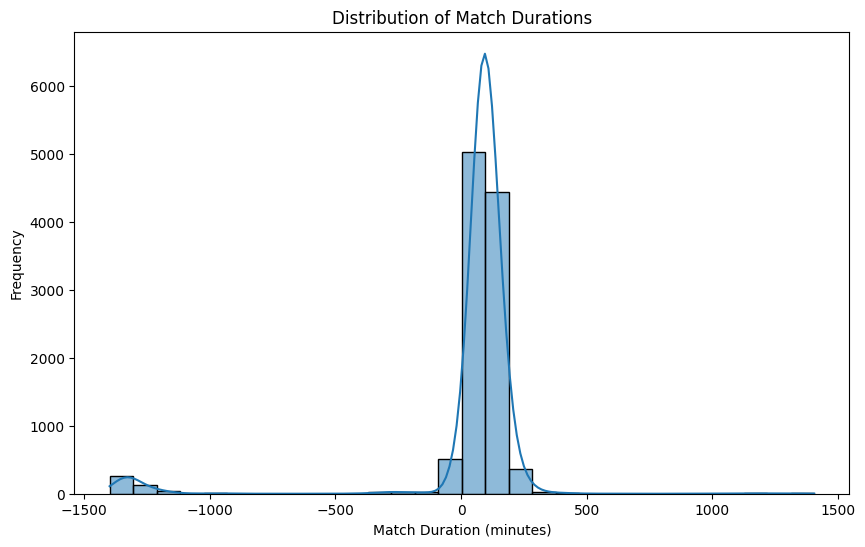

In [7]:
# Distribution of match durations
plt.figure(figsize=(10, 6))
sns.histplot(df['wh_minutes'], bins=30, kde=True)
plt.title('Distribution of Match Durations')
plt.xlabel('Match Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

In [8]:
# Check for negative values in the 'wh_minutes' column
negative_durations = df[df['wh_minutes'] < 0]
negative_durations.shape

(502, 12)

Strange that there are 502 matches with an associated negative wh_minutes. This by itself is not a reason to drop these rows. Just need to remember this case when using duration as a feature in further analysis

<Axes: title={'center': 'Top 10 highest number of matches played'}>

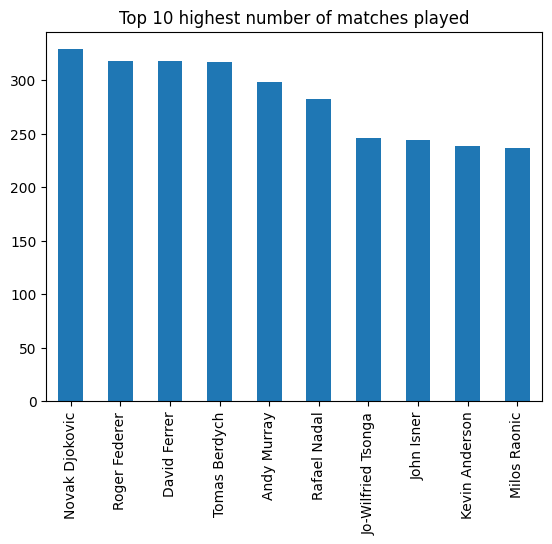

In [17]:
# get the top 10 players who played the most matches in this dataset. In order to do this, we should first concatenate the server1, server2 columns into 1 series so that we can then use value_counts
all_players = pd.concat([df['server1'], df['server2']])
all_players.value_counts().head(10).plot(kind='bar', title='Top 10 highest number of matches played')


<Axes: title={'center': 'Top 10 lowest number of matches played'}>

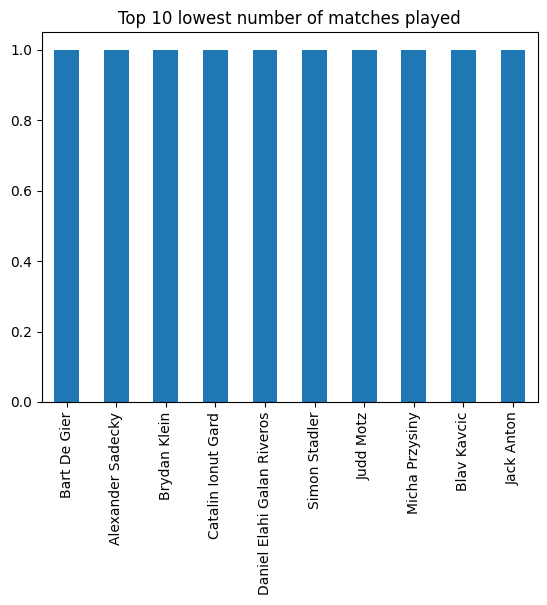

In [18]:
# bottom 10 players in terms of number of matches played
all_players.value_counts().sort_values(ascending=True).head(10).plot(kind='bar', title='Top 10 lowest number of matches played')

These players seem to have played just 1 match - not very representative of the average , active ATP tour player. So I want to see the bottom 10 lowest number of matches played amongst the players who at least played 20 matches

<Axes: title={'center': 'Lowest number of matches played'}>

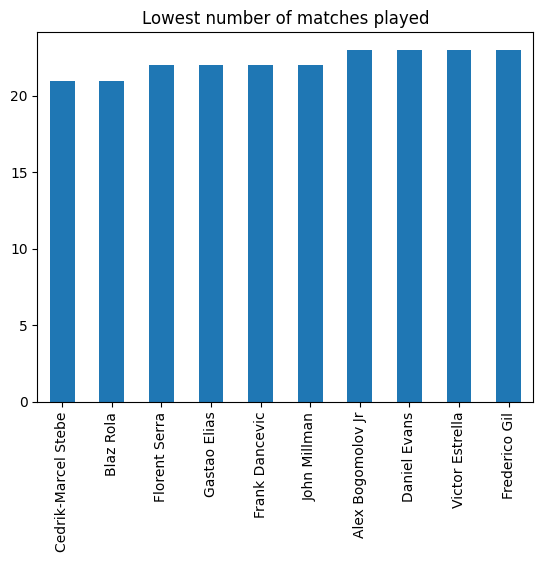

In [22]:
all_players.value_counts()[(all_players.value_counts() > 20)].sort_values(ascending=True).head(10).plot(kind='bar', title='Lowest number of matches played')

In [42]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [47]:
# Step 1: Set up Selenium and ChromeDriver
chromedriver_path = r'C:\Users\ssmovva\Downloads\chromedriver-win64\chromedriver-win64\chromedriver.exe'
service = Service(chromedriver_path)
options = webdriver.ChromeOptions()
options.add_argument('--headless')  # Run in headless mode
driver = webdriver.Chrome(service=service, options=options)

In [48]:
# Step 2: Open the web page
url = 'https://www.atptour.com/en/players/atp-head-2-head/roger-federer-vs-novak-djokovic/f324/d643'
driver.get(url)

In [49]:
# Step 3: Wait for the table to be rendered
wait = WebDriverWait(driver, 10)
wait.until(EC.presence_of_element_located((By.CLASS_NAME, 'event-breakdown-list')))

<selenium.webdriver.remote.webelement.WebElement (session="51dc595e4e146529c484b7b0f7febf38", element="f.6275ADF7E94013C08FD230C11D42091A.d.54CE7003FA7FFB82D4009ABEA4BC7E13.e.30199")>

In [50]:
# Step 4: Extract the rendered HTML
html_content = driver.page_source
driver.quit()

In [51]:
# Step 5: Parse the HTML with BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

In [40]:
# Step 5: Extract data rows from the <tbody>
rows = []
tbody = table.find('tbody')

# Check if tbody exists
if tbody:
    for row in tbody.find_all('tr'):
        columns = row.find_all('td')
        row_data = [col.text.strip() for col in columns]
        rows.append(row_data)
else:
    print("No <tbody> found in the table.")

# Print the extracted rows for debugging
print("Extracted rows:")
for row in rows:
    print(row)

Extracted rows:
['{{event.year}}', '{{event.winner.playerFirstName}} {{event.winner.playerLastName}}\n{{event.winner.partnerFirstName}} {{event.winner.partnerLastName}}\n\n\n\n\n\n\n{{event.winner.playerFirstName}} {{event.winner.playerLastName}}', '{{event.event}}', '{{event.round}}', '{{event.surface}}', '{{event.score}} {{ event.reason }}', 'Results\nDraws']


In [52]:
# Step 6: Identify the specific table within the div with class 'event-breakdown-list'
div = soup.find('div', class_='event-breakdown-list')
table = div.find('table')

In [53]:
# Step 7: Extract column names from the <thead>
headers = []
thead = table.find('thead')
for th in thead.find_all('th'):
    headers.append(th.text.strip())

In [54]:
headers

['Year', 'Winner', 'Event', 'Round', 'Surface', 'Score', 'View details']

In [55]:
# Step 8: Extract data rows from the <tbody>
rows = []
tbody = table.find('tbody')
for row in tbody.find_all('tr'):
    columns = row.find_all('td')
    row_data = [col.text.strip() for col in columns]
    rows.append(row_data)

# Step 9: Store data in a DataFrame
df = pd.DataFrame(rows, columns=headers)

In [56]:
df.head()

,Year,Winner,Event,Round,Surface,Score,View details
0,2020,Novak Djokovic,Australian Open,Semifinal,Outdoor Hard,76(1) 64 63,ResultsDraws
1,2019,Roger Federer,Nitto ATP Finals,Round Robin,Indoor Hard,64 63,ResultsDraws
2,2019,Novak Djokovic,Wimbledon,Final,Outdoor Grass,76(5) 16 76(4) 46 1312(3),ResultsDraws
3,2018,Novak Djokovic,ATP Masters 1000 Paris,Semifinal,Indoor Hard,76(6) 57 76(3),ResultsDraws
4,2018,Novak Djokovic,ATP Masters 1000 Cincinnati,Final,Outdoor Hard,64 64,ResultsDraws


In [57]:
# Save to CSV
df.to_csv('atp_event_breakdown.csv', index=False)

In [58]:
df.shape

(51, 7)

In [61]:
#Create One-Hot Encoded Columns for the winners so i can use this to calculate win rate for plotting
one_hot = pd.get_dummies(df['Winner'], prefix='one_hot_winner')
df = pd.concat([df, one_hot], axis=1)

In [62]:
df.head()

,Year,Winner,Event,Round,Surface,Score,View details,one_hot_winner_Novak Djokovic,one_hot_winner_Roger Federer
0,2020,Novak Djokovic,Australian Open,Semifinal,Outdoor Hard,76(1) 64 63,ResultsDraws,True,False
1,2019,Roger Federer,Nitto ATP Finals,Round Robin,Indoor Hard,64 63,ResultsDraws,False,True
2,2019,Novak Djokovic,Wimbledon,Final,Outdoor Grass,76(5) 16 76(4) 46 1312(3),ResultsDraws,True,False
3,2018,Novak Djokovic,ATP Masters 1000 Paris,Semifinal,Indoor Hard,76(6) 57 76(3),ResultsDraws,True,False
4,2018,Novak Djokovic,ATP Masters 1000 Cincinnati,Final,Outdoor Hard,64 64,ResultsDraws,True,False


In [71]:
# calculate winning rate - grouped by year
winning_rate = df.groupby('Year')[one_hot.columns].mean().reset_index()


In [87]:
# calculate number of matches per year
num_matches = df.groupby('Year').size().reset_index(name='num_matches')
num_matches['Year'] = num_matches['Year'].astype(int)

In [88]:
# Merge the number of matches with the winning rate DataFrame
winning_rate = pd.merge(winning_rate, num_matches, on='Year')


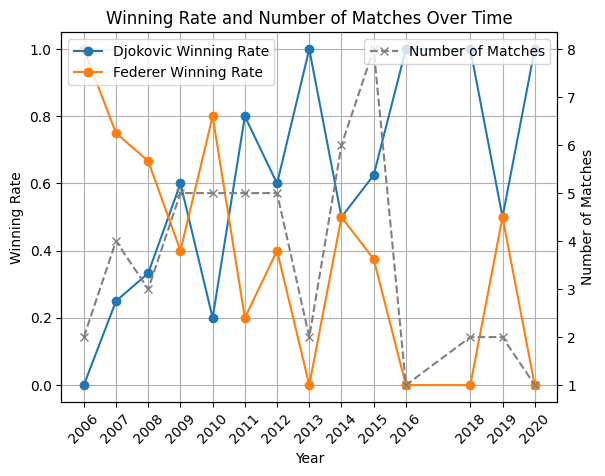

In [90]:
winning_rate['Year'] = winning_rate['Year'].astype(int)
fig, ax1 = plt.subplots()

# Plot winning rate
ax1.set_xlabel('Year')
ax1.set_ylabel('Winning Rate')
ax1.plot(winning_rate['Year'], winning_rate['one_hot_winner_Novak Djokovic'], label='Djokovic Winning Rate', marker='o')
ax1.plot(winning_rate['Year'], winning_rate['one_hot_winner_Roger Federer'], label='Federer Winning Rate', marker='o')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc='upper left')
ax1.grid(True)
# Ensure every year is displayed on the x-axis
ax1.set_xticks(winning_rate['Year'])

# Create a second y-axis for the number of matches
ax2 = ax1.twinx()
ax2.set_ylabel('Number of Matches')
ax2.plot(winning_rate['Year'], winning_rate['num_matches'], label='Number of Matches', color='gray', linestyle='--', marker='x')
ax2.legend(loc='upper right')

plt.title('Winning Rate and Number of Matches Over Time')
plt.show()

In [2]:
# getting match summary data of all the atp matches from Jeff Sackmans github repo
import requests
import pandas as pd
from io import StringIO


In [3]:
# Replace with your GitHub repository details
user = 'JeffSackmann'
repo = 'tennis_atp'
branch = 'master'

In [4]:
# List of CSV file paths in the repository that i am interested in - I am interested only in 
# Fed-Novak matches, so starting in 2006 till 2020
csv_files = [
    'atp_matches_2006.csv','atp_matches_2007.csv','atp_matches_2008.csv',
    'atp_matches_2009.csv','atp_matches_2010.csv','atp_matches_2011.csv',
    'atp_matches_2012.csv','atp_matches_2013.csv','atp_matches_2014.csv',
    'atp_matches_2015.csv','atp_matches_2016.csv','atp_matches_2017.csv',
    'atp_matches_2018.csv','atp_matches_2019.csv','atp_matches_2020.csv'

]

In [5]:
csv_base_url = f'https://raw.githubusercontent.com/{user}/{repo}/{branch}/'

In [6]:
csv_base_url

'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/'

In [7]:
dfs = []

for csv_file in csv_files:
    url = csv_base_url + csv_file
    response = requests.get(url)
    if response.status_code == 200:
        csv_data = StringIO(response.text)
        df = pd.read_csv(csv_data)
        dfs.append(df)
    else:
        print(f"Failed to fetch {csv_file}")


In [8]:
type(dfs[0])

pandas.core.frame.DataFrame

In [9]:
#seeing if shape of all the files is the same
total_rows = 0
for i in range(len(dfs)):
    print(dfs[i].shape)
    total_rows += dfs[i].shape[0]
print(f'total rows = {total_rows}')

(3267, 49)
(3192, 49)
(3123, 49)
(3085, 49)
(3030, 49)
(3015, 49)
(3009, 49)
(2944, 49)
(2901, 49)
(2943, 49)
(2941, 49)
(2911, 49)
(2897, 49)
(2806, 49)
(1462, 49)
total rows = 43526


In [10]:
#okay the number of columns is the same, thats good. 
#concatenate all data into 1 file and then just take the subset of the 50 odd matches 
# that fed and novak played against eachother
df_concat = pd.DataFrame()
for i in range(len(dfs)):
    df_concat = pd.concat([df_concat, dfs[i]])

df_concat.shape


(43526, 49)

In [11]:
df_concat.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2006-1536,Madrid Masters,Hard,48,M,20061016,1,103454,NaN,NaN,...,35.0,25.0,8.0,9.0,1.0,4.0,45.0,795.0,20.0,1245.0
1,2006-1536,Madrid Masters,Hard,48,M,20061016,2,104417,NaN,NaN,...,35.0,22.0,10.0,9.0,6.0,8.0,29.0,988.0,32.0,950.0
2,2006-1536,Madrid Masters,Hard,48,M,20061016,3,104068,NaN,NaN,...,40.0,30.0,17.0,12.0,3.0,6.0,47.0,775.0,81.0,501.0
3,2006-1536,Madrid Masters,Hard,48,M,20061016,4,103428,NaN,NaN,...,30.0,21.0,6.0,8.0,3.0,6.0,35.0,915.0,43.0,825.0
4,2006-1536,Madrid Masters,Hard,48,M,20061016,5,103898,NaN,Q,...,25.0,12.0,8.0,7.0,2.0,6.0,46.0,785.0,107.0,397.0


In [12]:
#getting just the subset of matches where Fed played Novak
player_list = ['Roger Federer','Novak Djokovic']
df_concat_subset = df_concat.query('winner_name in @player_list and loser_name in @player_list')

In [13]:
#this should be about 50 matches from the ATP official website. check that
df_concat_subset.shape[0]

51

In [14]:
# get a head to head record - Djokovic won 27 matches, 1 was walk over. Somehow the ATP site doesnt count that 
# towards his win loss. It says 27-23, but with the walk over Novak got, 28-23 is accurate
df_concat_subset.winner_name.value_counts()

winner_name
Novak Djokovic    28
Roger Federer     23
Name: count, dtype: int64

In [15]:
# check all the columns
df_concat_subset.dtypes

tourney_id             object
tourney_name           object
surface                object
draw_size               int64
tourney_level          object
tourney_date            int64
match_num               int64
winner_id               int64
winner_seed           float64
winner_entry           object
winner_name            object
winner_hand            object
winner_ht             float64
winner_ioc             object
winner_age            float64
loser_id                int64
loser_seed            float64
loser_entry            object
loser_name             object
loser_hand             object
loser_ht              float64
loser_ioc              object
loser_age             float64
score                  object
best_of                 int64
round                  object
minutes               float64
w_ace                 float64
w_df                  float64
w_svpt                float64
w_1stIn               float64
w_1stWon              float64
w_2ndWon              float64
w_SvGms   

In [16]:
# create a binary column 1 or 0 for 'Novak Wins'. We can use this to do the investigation 
# of what features helped gradually gain an advantage in the matchup
df_concat_subset['Novak_Wins'] = (df_concat_subset['winner_name']=='Novak Djokovic').astype(int)

C:\Users\ssmovva\AppData\Local\Temp\ipykernel_35220\840638209.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat_subset['Novak_Wins'] = (df_concat_subset['winner_name']=='Novak Djokovic').astype(int)


In [17]:
# create a year column from the tourney_date column
df_concat_subset['year'] = df_concat_subset['tourney_date'].astype('str').str[:4]

C:\Users\ssmovva\AppData\Local\Temp\ipykernel_35220\3076660896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat_subset['year'] = df_concat_subset['tourney_date'].astype('str').str[:4]


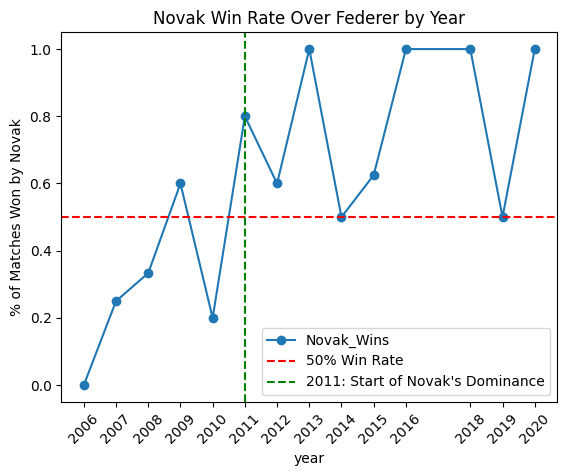

In [37]:
# now plot novak's win rate by year
import matplotlib.pyplot as plt

avg_novak_wins = df_concat_subset.groupby('year')['Novak_Wins'].mean().reset_index()
avg_novak_wins['year'] = pd.to_numeric(avg_novak_wins['year'], errors='coerce')
ax = avg_novak_wins.plot(x='year', y='Novak_Wins', kind='line', marker='o', title='Novak Win Rate Over Federer by Year')
ax.set_ylabel('% of Matches Won by Novak')
ax.axhline(y=0.5, color='r', linestyle='--', label='50% Win Rate')

ax.set_xticks(avg_novak_wins['year'])
ax.tick_params(axis='x', rotation=45)
ax.axvline(x=2011, color='g', linestyle='--', label='2011: Start of Novak\'s Dominance')
ax.legend()
plt.show()

Logistic Regression Accuracy: 0.9
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.83      1.00      0.91         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10

Decision Tree Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10

Random Forest Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80     

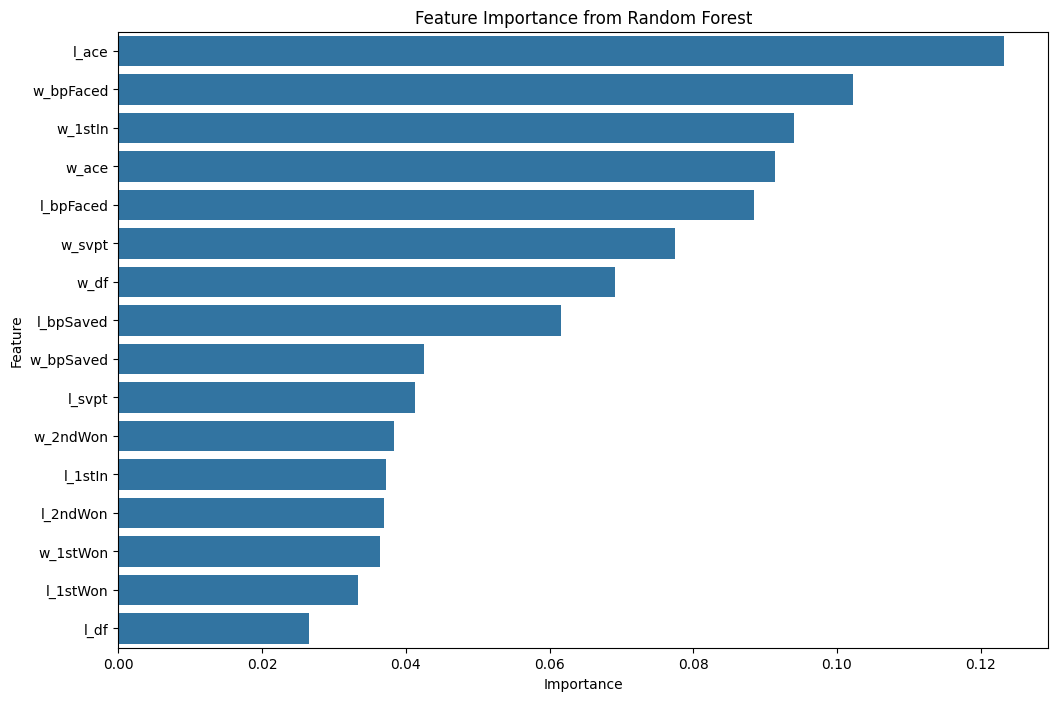

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

df_concat_subset.columns
# Select features for the model
features = ['w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_bpSaved', 'w_bpFaced', 
            'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_bpSaved', 'l_bpFaced']

# Drop rows with missing values in the selected features
df_model = df_concat_subset.dropna(subset=features + ['Novak_Wins'])

# Define X and y
X = df_model[features]
y = df_model['Novak_Wins']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

# Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

# Random Forest Classifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)
y_pred_forest = forest_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))

# Feature importance from Random Forest
importances = forest_clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()


In [40]:
# create a column for before 2011 and after 2011
df_concat_subset['time_window'] = df_concat_subset['year'].apply(lambda x: 'Before 2011' if int(x) < 2011 else 'After 2011')

C:\Users\ssmovva\AppData\Local\Temp\ipykernel_35220\3691139291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat_subset['time_window'] = df_concat_subset['year'].apply(lambda x: 'Before 2011' if int(x) < 2011 else 'After 2011')


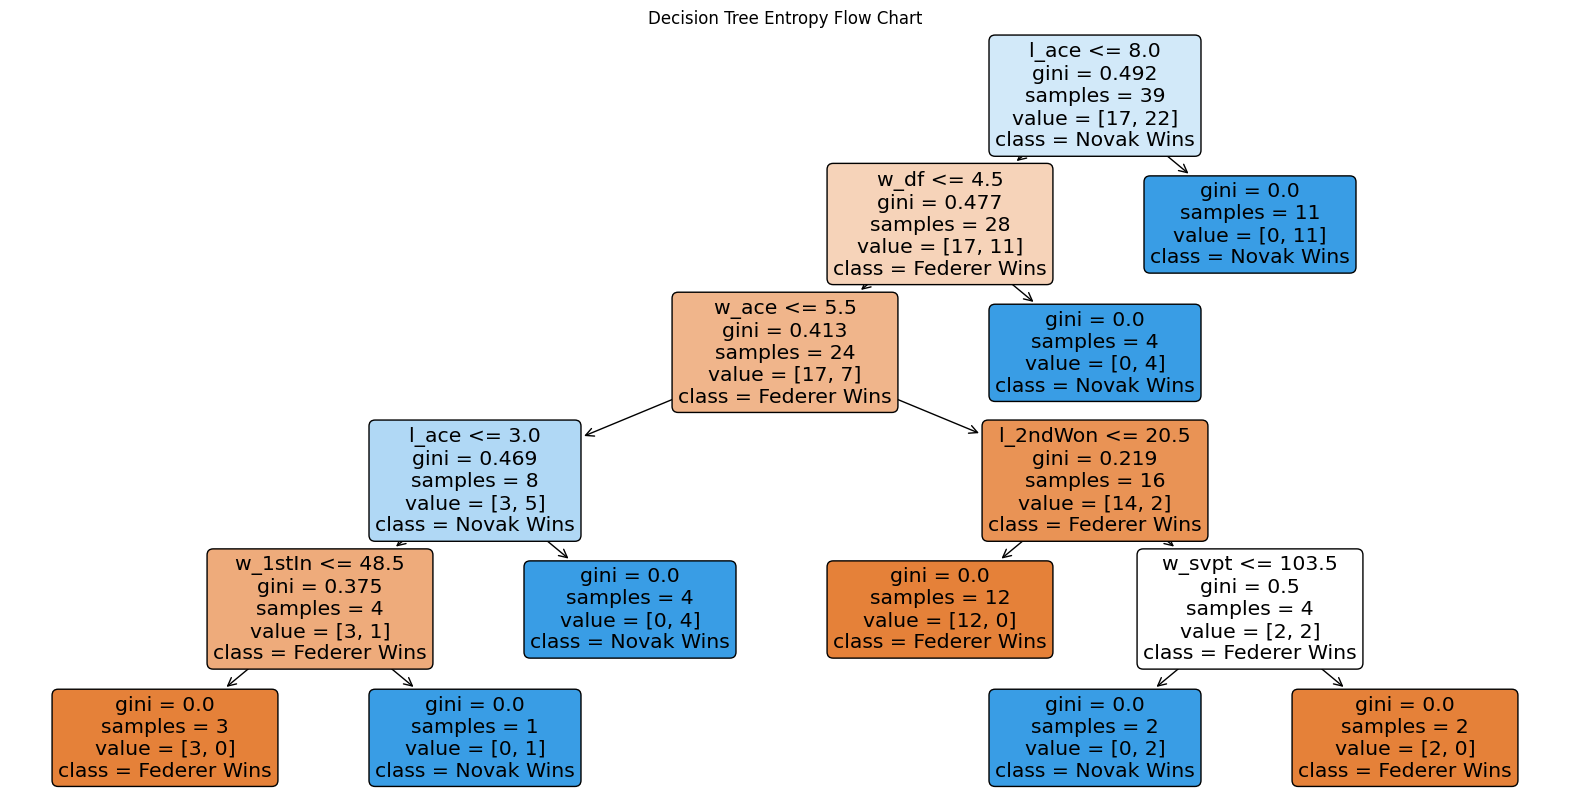

In [43]:
from sklearn.tree import plot_tree

# Train a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_clf, feature_names=X.columns, class_names=['Federer Wins', 'Novak Wins'], filled=True, rounded=True)
plt.title('Decision Tree Entropy Flow Chart')
plt.show()


2024-10-07 15:56:57.651 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-07 15:56:57.849 
  command:

    streamlit run C:\Users\ssmovva\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-10-07 15:56:57.850 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-07 15:56:57.850 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-07 15:56:57.851 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-07 15:56:57.892 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-07 15:56:57.893 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-07 15:56:57.895 Th

DeltaGenerator()

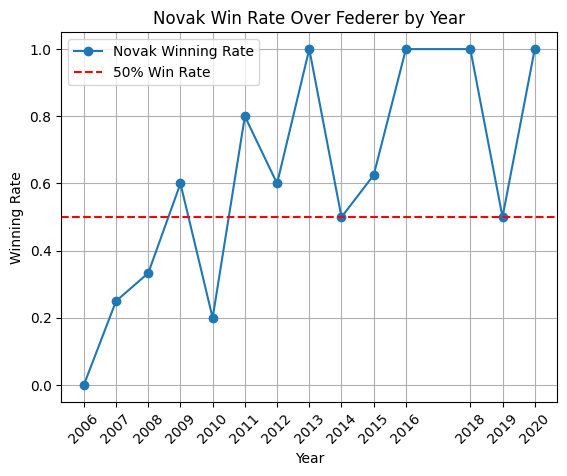

In [44]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Use the existing df_concat_subset
df = df_concat_subset

# Title of the app
st.title('Federer vs Djokovic Matches Data Analysis')

# Display the dataframe
st.header('DataFrame')
st.write(df.head())







# Winning rate over time
st.header('Winning Rate Over Time')
winning_rate = avg_novak_wins  # Use the existing avg_novak_wins DataFrame
fig, ax1 = plt.subplots()

# Plot winning rate
ax1.set_xlabel('Year')
ax1.set_ylabel('Winning Rate')
ax1.plot(winning_rate['year'], winning_rate['Novak_Wins'], label='Novak Winning Rate', marker='o')
ax1.axhline(y=0.5, color='r', linestyle='--', label='50% Win Rate')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc='upper left')
ax1.grid(True)
# Ensure every year is displayed on the x-axis
ax1.set_xticks(winning_rate['year'])

plt.title('Novak Win Rate Over Federer by Year')
st.pyplot(fig)


In [ ]:
To run the Streamlit app, you need to execute the Streamlit command in your terminal or command prompt. Here are the steps:
If
1. Save your Jupyter Notebook as a Python script. You can do this by going to `File -> Download as -> Python (.py)` in the Jupyter Notebook interface.

2. Open a terminal or command prompt.

3. Navigate to the directory where your Python script is saved.

4. Run the Streamlit app using the following command:
    ```sh
    streamlit run your_script_name.py
    ```

Replace `your_script_name.py` with the name of your saved Python script.

This will start a local web server and open the Streamlit app in your default web browser.